In [ ]:
!pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [ ]:
data=pd.read_csv("https://drive.google.com/u/0/uc?id=1411Dl3FmdBcVrEg_T1x0FRSQ1T9JVFUv&export=download")

---
# EXPLORATORY DATA ANALYSIS
---

In [ ]:
data

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,1,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,...,8,6,4,0,5,Medium,0,Bad,Low,Yes
1,1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,...,10,10,7,1,7,High,3,Better,Very High,No
2,1,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,...,7,0,0,0,0,Low,3,Bad,Medium,Yes
3,1,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,...,8,8,7,3,0,Very High,3,Better,High,No
4,1,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,...,6,2,2,2,2,Low,3,Better,Very High,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,2061,Research & Development,Laboratory Technician,Male,36,Married,College,Medical,Travel_Frequently,...,17,5,2,0,3,High,3,Better,High,No
1466,1,2062,Research & Development,Healthcare Representative,Male,39,Married,Below College,Medical,Travel_Rarely,...,9,7,7,1,7,Very High,5,Better,Low,No
1467,1,2064,Research & Development,Manufacturing Director,Male,27,Married,Bachelor,Life Sciences,Travel_Rarely,...,6,6,2,0,3,Medium,0,Better,Medium,No
1468,1,2065,Sales,Sales Executive,Male,49,Married,Bachelor,Medical,Travel_Frequently,...,17,9,6,0,8,Very High,3,Good,Very High,No


In [ ]:
data.shape

(1470, 29)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Employee Count              1470 non-null   int64 
 1   Employee ID                 1470 non-null   int64 
 2   Department                  1470 non-null   object
 3   Job Role                    1470 non-null   object
 4   Gender                      1470 non-null   object
 5   Age                         1470 non-null   int64 
 6   Marital Status              1470 non-null   object
 7   Education                   1470 non-null   object
 8   Education Field             1470 non-null   object
 9   Business Travel             1470 non-null   object
 10  Distance From Home (kms)    1470 non-null   int64 
 11  Job Involvement             1470 non-null   object
 12  Job Level                   1470 non-null   int64 
 13  Job Satisfaction            1470 non-null   obje

No NA values present

In [ ]:
data.rename(columns=lambda x : x.strip().replace(" ","_" ),inplace=True)

In [ ]:
data.columns

Index(['Employee_Count', 'Employee_ID', 'Department', 'Job_Role', 'Gender',
       'Age', 'Marital_Status', 'Education', 'Education_Field',
       'Business_Travel', 'Distance_From_Home_(kms)', 'Job_Involvement',
       'Job_Level', 'Job_Satisfaction', 'Monthly_Income_(USD)',
       'Salary_Hike_(%)', 'Stock_Option_Level', 'Over_Time',
       'No._of_Companies_Worked', 'Total_Working_Years', 'Years_At_Company',
       'Years_In_Current_Role', 'Years_Since_Last_Promotion',
       'Years_With_Curr_Manager', 'Environment_Satisfaction',
       'Training_Times_Last_Year', 'Work_Life_Balance',
       'Relationship_Satisfaction', 'Attrition_(Yes/No)'],
      dtype='object')

In [ ]:
data.Employee_Count.unique() # since all rows have same value it is no use to us
data.drop(["Employee_Count","Employee_ID"],axis=1,inplace=True)

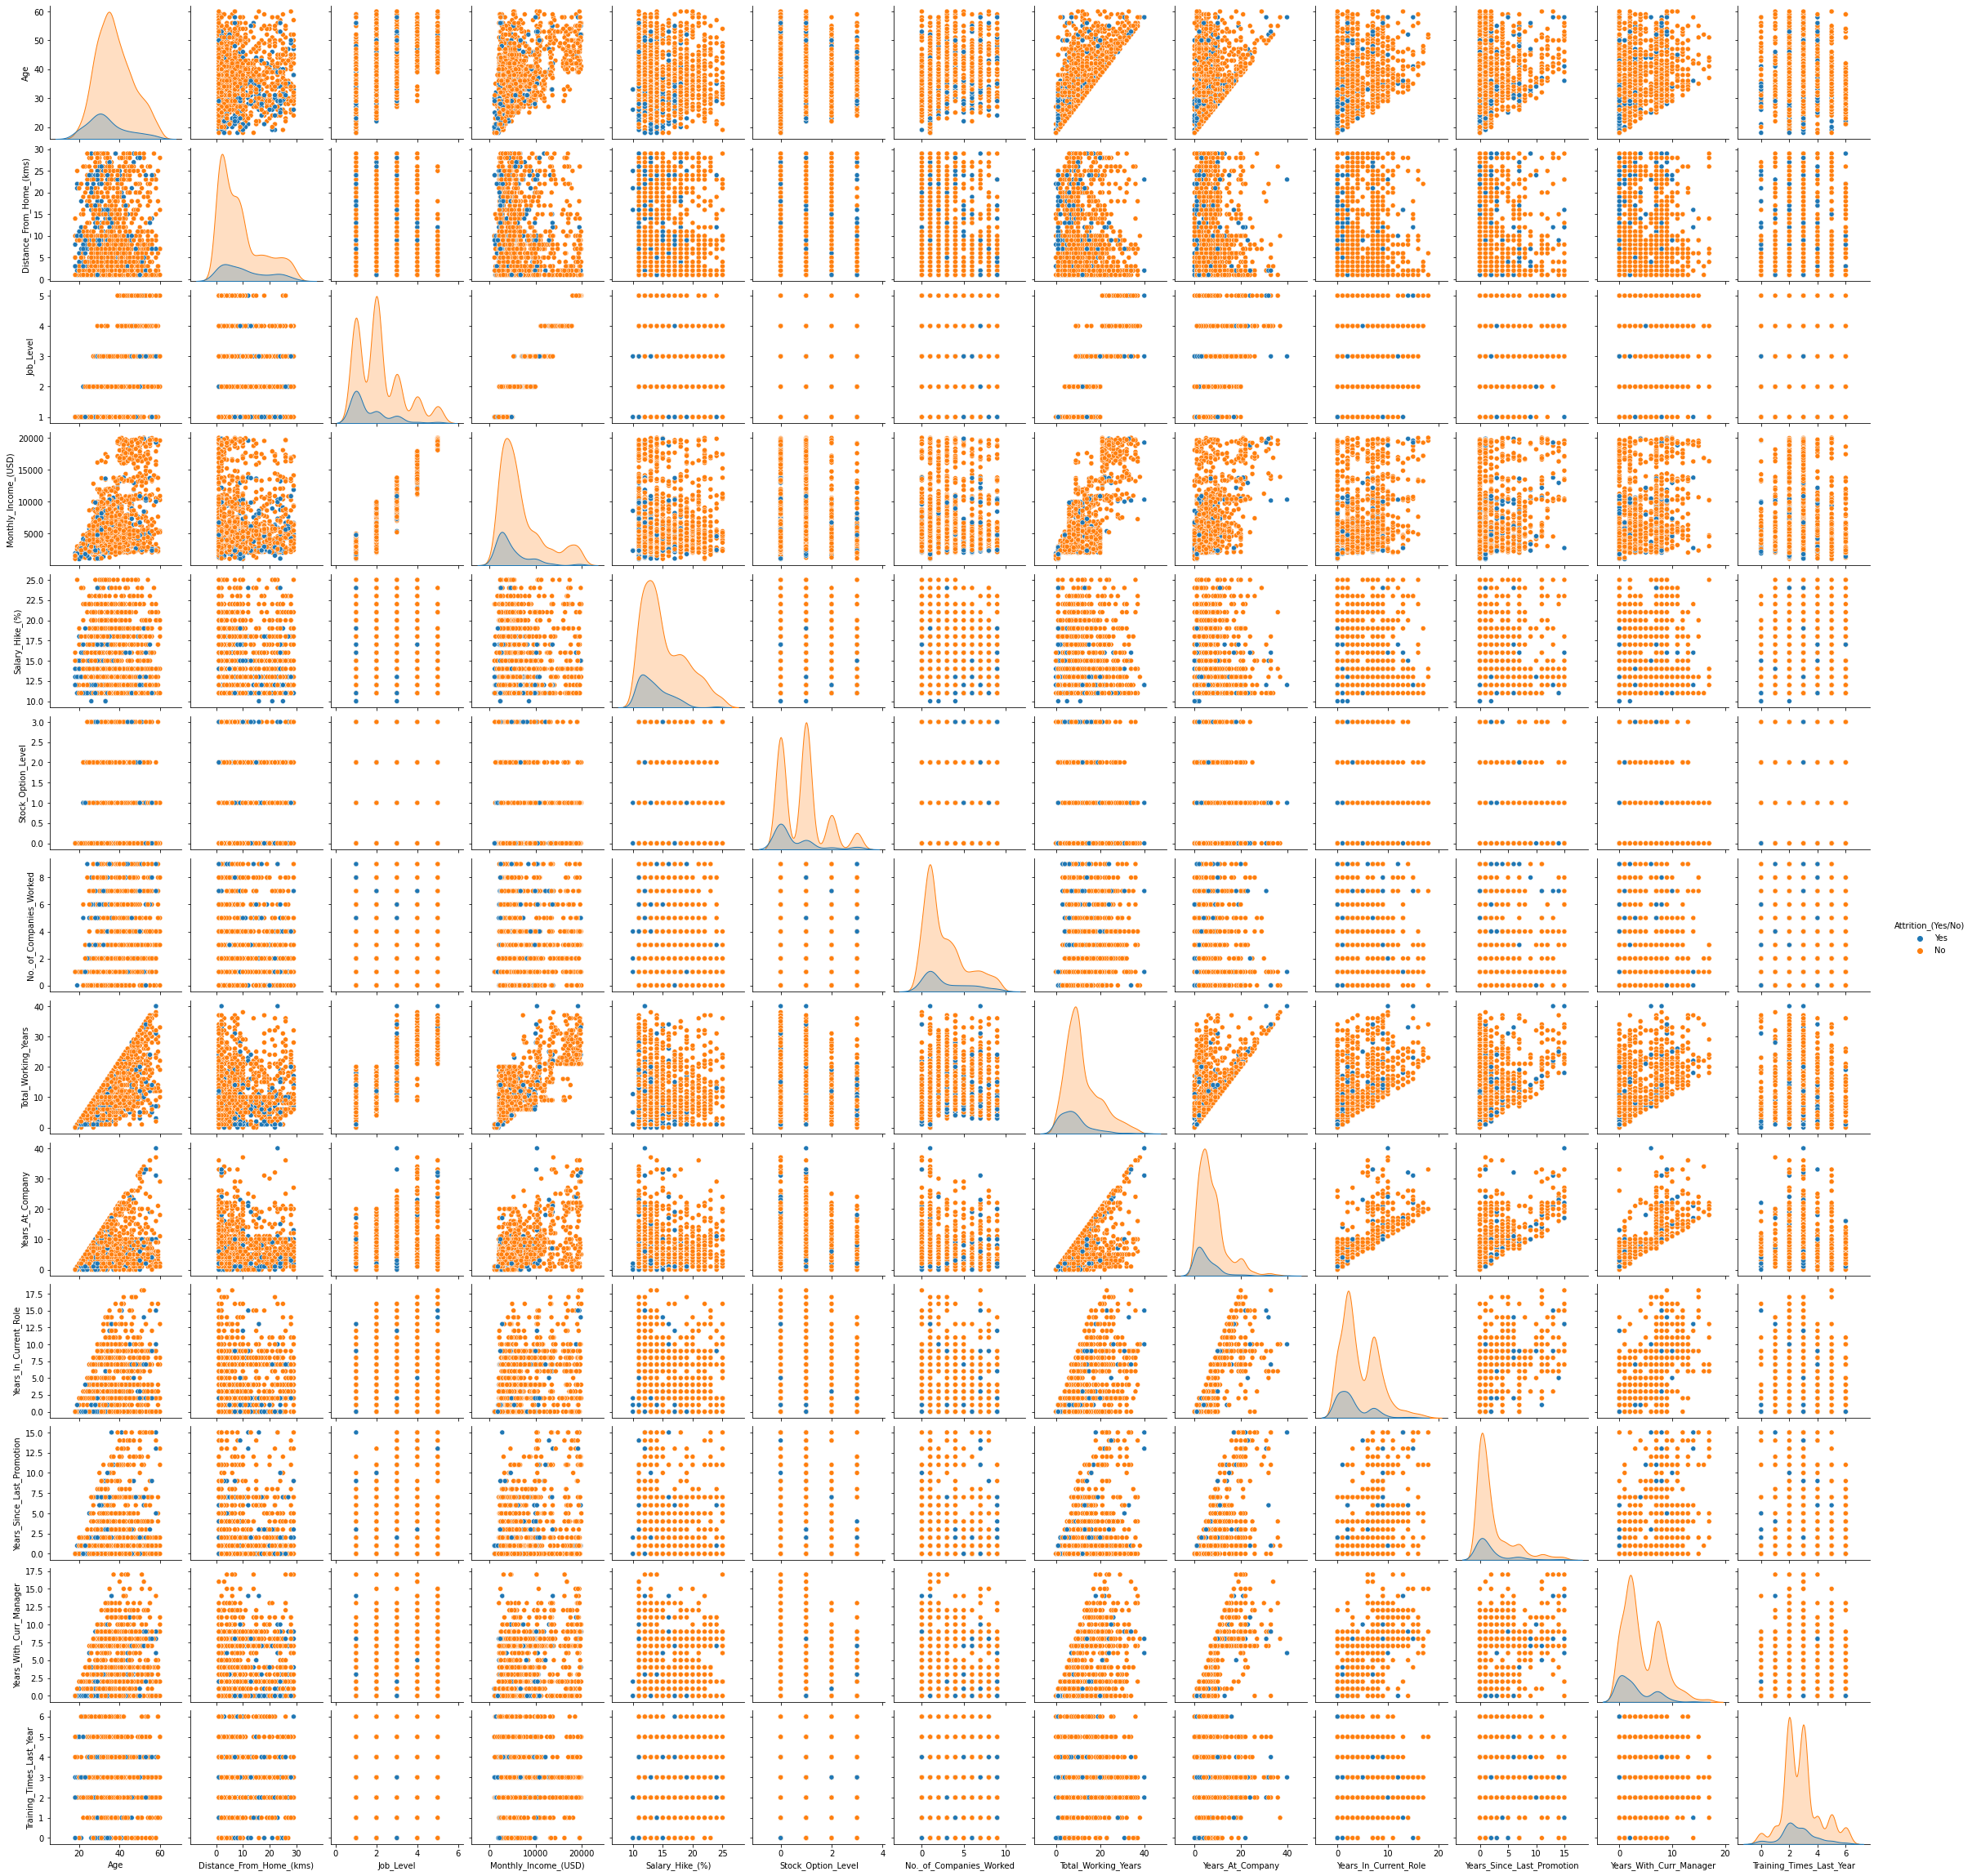

In [310]:
sns.pairplot(data,hue="Attrition_(Yes/No)")

Following observations can be made from the above pairplot :-

1. It can be observed that most of attrition comes from low slary hikes (scattter plots associated with salary hike, row 5)
2. Job Level also seems to have some effect on attrition


In [ ]:
for hike in range(16,20):  
  percent=data[(data['Salary_Hike_(%)']>=hike)].shape[0]/data.shape[0]*100
  print(f"{100-percent}% have hike less than {hike}%")

65.03401360544217% have hike less than 16%
70.61224489795919% have hike less than 17%
76.19047619047619% have hike less than 18%
82.10884353741497% have hike less than 19%


In [ ]:
for hike in range(16,20):  
  percent=data[(data['Salary_Hike_(%)']>=hike)&(data['Attrition_(Yes/No)']=="Yes")].shape[0]/data[data['Attrition_(Yes/No)']=="Yes"].shape[0]*100
  print(f"{100-percent}% attrition comes from employees with salary hike less than {hike}%")

78.90295358649789% attrition comes from employees with salary hike less than 16%
86.49789029535864% attrition comes from employees with salary hike less than 17%
92.40506329113924% attrition comes from employees with salary hike less than 18%
97.0464135021097% attrition comes from employees with salary hike less than 19%


This shows a mild correlation between salary hike and attrition

In [ ]:
df=pd.crosstab(data['Attrition_(Yes/No)'],data['Job_Level'])

In [ ]:
df

Job_Level,1,2,3,4,5
Attrition_(Yes/No),,,,,
No,400,482,186,101,64
Yes,143,52,32,5,5


In [ ]:
output=chi2_contingency(df)
print(f"P value for chi square test of independence is {output[1]}")

P value for chi square test of independence is 6.634684715458909e-15


Therefore we can reject null hypothesis that Job_Level is independent of attrition rate, Job_Level has effect on attrition 

In [ ]:
df=pd.crosstab(data['Attrition_(Yes/No)'],data['Job_Level'],margins=True,normalize="index",margins_name="Total")

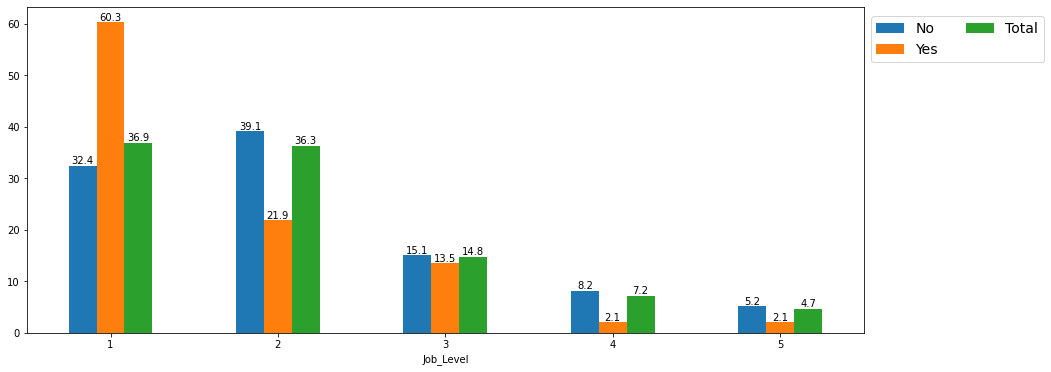

In [ ]:
ax=df.T.apply(lambda x : round(x,3)*100).plot(kind='bar',figsize=(15,6))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9),ncol=2,fontsize=14)
plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)

We can observe from the above table that most of attrition comes from people with low job level, job level 1 though it accounts for 36% of workforce but amounts for massive 60% of attrition

In [ ]:
grouped_data=data.groupby('Attrition_(Yes/No)')
for group in grouped_data.groups:
  income=grouped_data.get_group(group)['Monthly_Income_(USD)'].median()
  print(f"Median USD income is ${income*12:.0f} for {group} group")

Median USD income is $62448 for No group
Median USD income is $38424 for Yes group


We can see there is a big difference in the median income of people leaving and people staying

In [ ]:
df=pd.crosstab(data['Attrition_(Yes/No)'],data['Stock_Option_Level'])

In [ ]:
df

Stock_Option_Level,0,1,2,3
Attrition_(Yes/No),,,,
No,477,540,146,70
Yes,154,56,12,15


In [ ]:
output=chi2_contingency(df)
print(f"P value for chi square test of independence is {output[1]}")

P value for chi square test of independence is 4.379390336108354e-13


In [ ]:
df=pd.crosstab(data['Attrition_(Yes/No)'],data['Stock_Option_Level'],margins=True,normalize="index",margins_name="Total")*100

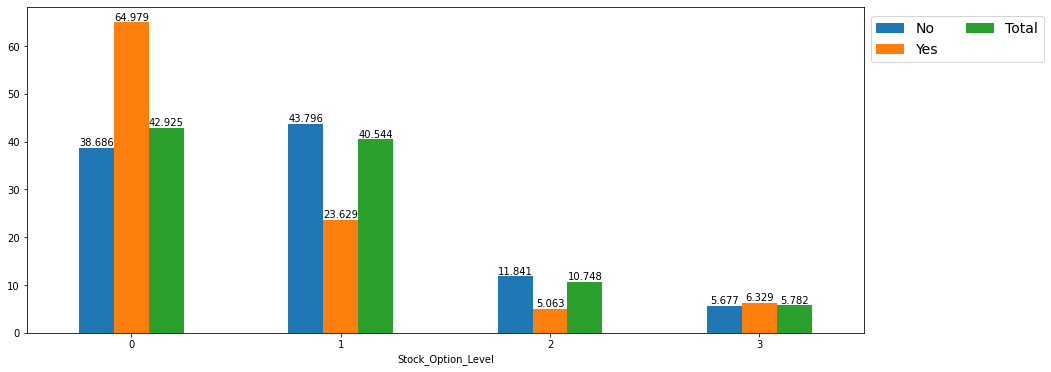

In [ ]:
ax=df.T.apply(lambda x : round(x,3)).plot(kind='bar',figsize=(15,6))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9),ncol=2,fontsize=14)
plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)

We can see here also though level 0 accounts of 42% of total workforce but accounts for 64% of attrition rate whereas in contrast level 2 which accounts for 40 % of workforce accounts for almost 1/3rd of attrition rate as that of level 0

In [ ]:
pd.crosstab(data['Attrition_(Yes/No)'],data['Years_With_Curr_Manager'],margins=True,normalize="index",margins_name="Total")*100

Years_With_Curr_Manager,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Attrition_(Yes/No),,,,,,,,,,,,,,,,,,
No,14.436334,5.271695,23.844282,9.975669,7.055961,2.189781,2.027575,15.004055,7.866991,4.703974,1.946472,1.703163,1.459854,1.135442,0.243309,0.405515,0.162206,0.567721
Yes,35.864979,4.641350,21.097046,8.016878,4.641350,1.687764,1.687764,13.080169,4.219409,2.531646,1.265823,0.421941,0.000000,0.000000,0.843882,0.000000,0.000000,0.000000
Total,17.891156,5.170068,23.401361,9.659864,6.666667,2.108844,1.972789,14.693878,7.278912,4.353741,1.836735,1.496599,1.224490,0.952381,0.340136,0.340136,0.136054,0.476190


We can observe that people with 0 years under current manager have a much higher chance of leaving, we need to further analyse this topic and talk to HR specialists to come to any conclusion 

In [ ]:
df=pd.crosstab(data['Attrition_(Yes/No)'],data['Relationship_Satisfaction'],normalize="index",margins=True);df*100

Relationship_Satisfaction,High,Low,Medium,Very High
Attrition_(Yes/No),,,,
No,31.467964,17.761557,20.924574,29.845904
Yes,16.033755,53.586498,29.535865,0.843882
All,28.979592,23.537415,22.312925,25.170068


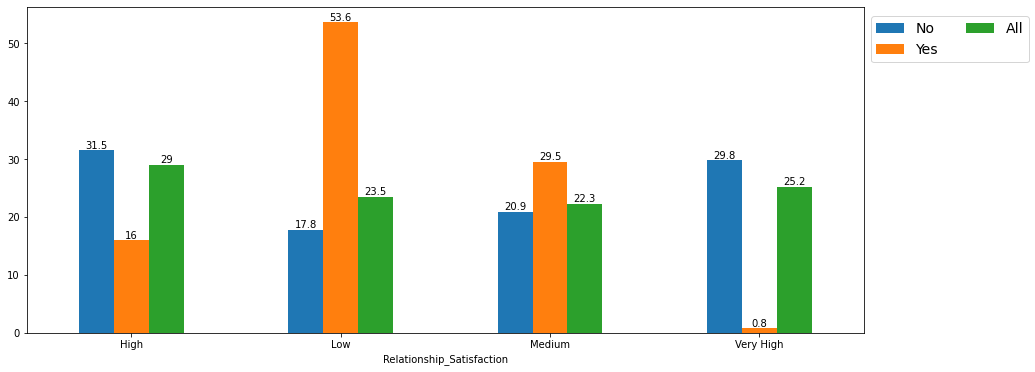

In [ ]:
ax=df.T.apply(lambda x : round(x,3)*100).plot(kind='bar',figsize=(15,6))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9),ncol=2,fontsize=14)
plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)

We can evidently see that though only 23% of workforce comes under Low satisfaction category but it accounts for more than half of the attrition rate.

In [ ]:
df=pd.crosstab(data['Attrition_(Yes/No)'],data['Environment_Satisfaction'],normalize="index",margins=True,margins_name="Total");df*100

Environment_Satisfaction,High,Low,Medium,Very High
Attrition_(Yes/No),,,,
No,31.711273,17.193836,19.789132,31.305758
Yes,25.316456,32.067511,18.143460,24.472574
Total,30.680272,19.591837,19.523810,30.204082


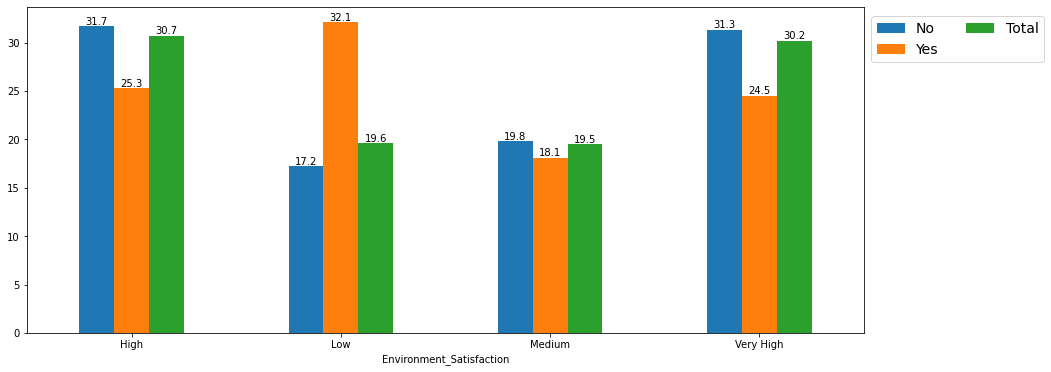

In [ ]:
ax=df.T.apply(lambda x : round(x,3)*100).plot(kind='bar',figsize=(15,6))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9),ncol=2,fontsize=14)
plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container)

We can see from the graph how Low satisfaction accounts only 19 percent but contributed to 32% of the attrition

This is a very similar case of the above observation

### OBSERVATIONS

1. By the above analysis we can see that Low Environment and Relationship satisfaction has high correlation with attrition.
2. Similarly,  people with low stock level also tend to leave which can be seen in case of Job level as well.
3. Also there is a vast difference between median salary of employee leaving and staying.
4. These all above observation points that employees with better perks do not leave as much as the ones which are devoid of it.
5. Maybe people with lower perks find better opportunities else where and thus company ends up losing them, this needs further analysis.

---
# MODEL BUILDING
---

Since most Machine Learning models require data to be numeric we need to do some preprocessing:

1. Converting categorical variable on the basis whether they are ordinal or nominal(OHE).

OneHotEncoding -->  Department,   Job_Role,   Marital_Status,   Education_Field

---

OrdinalEncoding  --> Gender (Though gender is a categorical variable and hence OHE is better but since it has only 
                               2 possible values,   to reduce dimensions we can consider OrdinalEncoding),   \\
                   Education,  Business_Travel,  Job_Involvement,   Job_Satisfaction,  Over_Time(similar case to gender),  
                      Work_Life_Balance,  Relationship_Satisfaction

---

LabelEncoding  -->  Attrition_(Yes/No) We will consider employee leaving as positive class [1] and not leaving [0]


In [ ]:
# OneHotEncoding -->  'Department', 'Job_Role', 'Marital_Status', 'Education_Field'
# OrdinalEncoding  --> 
#                       'Education','Business_Travel','Job_Involvement','Job_Satisfaction','Over_Time'(similar case to gender),
#                       'Work_Life_Balance','Relationship_Satisfaction'
# LabelEncoding  -->  'Attrition_(Yes/No)' We will consider employee leaving as positive class [1] and not leaving [0]


In [185]:
data[data['Attrition_(Yes/No)']=="No"].shape[0]/data.shape[0]*100
# A dummy model can automatically get 83% accuracy by assigning everything to No, thus this is our baseline

83.87755102040816

In [311]:
data[data['Attrition_(Yes/No)']=="No"].shape[0]/data.shape[0]*100
# A dummy model can automatically get 83% accuracy by assigning everything to No, thus this is our baseline

83.87755102040816

In [230]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from scipy.stats import uniform
from sklearn.metrics import ConfusionMatrixDisplay

I have taken two approaches to preprocess, one by converting all categorical variables to one hot encoding and other in which nominal is converted to OHE whereas ordinal variables are converted using OrdinalEncoder 

In [174]:
X,y=data.iloc[:,:-1],data.iloc[:,-1]

In [175]:
label=LabelEncoder()
y=label.fit_transform(y)

Since here are no learnable parameters we can transform the entire dataset in one go

In [200]:
ordinal=OrdinalEncoder(categories=[np.array([ 'Below College', 'College','Bachelor', 'Master','Doctor' ]),
                                   np.array([ 'Non-Travel','Travel_Rarely', 'Travel_Frequently']),
                                   np.array(['Low', 'Medium','High' , 'Very High']),
                                   np.array(['Low', 'Medium','High' , 'Very High']),
                                   np.array(['Low', 'Medium','High' , 'Very High']),
                                   np.array(['Bad', 'Better', 'Good', 'Best']),
                                   np.array(['Low', 'Medium','High' , 'Very High'])])

In [201]:
oe_cat_col = ColumnTransformer([('Ordinal', ordinal,[5,7,9,11,22,24,25])])  #selecting ordinal features for preprocessing
ohe_cat_col = ColumnTransformer([('OHE', OneHotEncoder(drop='if_binary'),[0,1,2,4,6,15])])
num_col = Pipeline([('selector',ColumnTransformer([('select_num','passthrough',[3,8,10,12,13,14,16,17,18,19,20,21,23])])),('std_scaler', StandardScaler())])

num_feat = FeatureUnion(transformer_list=[("num_col", num_col),("cat_col", oe_cat_col)])
num_pipe=Pipeline([("num_feat",num_feat),("scale",StandardScaler())])

full_pipe=FeatureUnion(transformer_list=[("num_pipe", num_pipe),("ohe_cat_col", ohe_cat_col)])

In [202]:
X1=full_pipe.fit_transform(X)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.2, random_state=42,stratify=y)

In [203]:
ohe_cat_col = ColumnTransformer([('OHE', OneHotEncoder(drop='if_binary'),[0,1,2,4,6,15,5,7,9,11,22,24,25])])
num_col = Pipeline([('selector',ColumnTransformer([('select_num','passthrough',[3,8,10,12,13,14,16,17,18,19,20,21,23])])),('std_scaler', StandardScaler())])

num_pipe=Pipeline([("num_col",num_col),("scale",StandardScaler())])

full_pipe=FeatureUnion(transformer_list=[("num_pipe", num_pipe),("ohe_cat_col", ohe_cat_col)])

In [204]:
X2=full_pipe.fit_transform(X)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42,stratify=y)

Checking accuracy without tuning any parameters for both the processed data

#### Logistic Regression

In [228]:
logit=LogisticRegression(random_state=42,max_iter=1000);logit.fit(X_train1,y_train1)
print(f"Training accuracy for this model is {logit.score(X_train1,y_train1)}")
print(f"Testing accuracy for this model is {logit.score(X_test1,y_test1)}")

Training accuracy for this model is 0.9251700680272109
Testing accuracy for this model is 0.8979591836734694


In [229]:
logit=LogisticRegression(random_state=42,max_iter=1000);logit.fit(X_train2,y_train2)
print(f"Training accuracy for this model is {logit.score(X_train2,y_train2)}")
print(f"Testing accuracy for this model is {logit.score(X_test2,y_test2)}")

Training accuracy for this model is 0.9404761904761905
Testing accuracy for this model is 0.9183673469387755


We can see that encoding using OHE seems to work better, let us now tune our parameters

In [225]:
logistic=LogisticRegression(max_iter=1000)
param_grid={"C":uniform(loc=0, scale=4)}
clf = RandomizedSearchCV(logistic, param_grid, random_state=1, n_iter=100, cv=5,)

In [226]:
best_model = clf.fit(X_train1, y_train1)
best_model.score(X_train1, y_train1),best_model.score(X_test1, y_test1)

(0.923469387755102, 0.9013605442176871)

In [227]:
best_model = clf.fit(X_train2, y_train2)
best_model.score(X_train2, y_train2),best_model.score(X_test2, y_test2)

(0.9387755102040817, 0.9149659863945578)

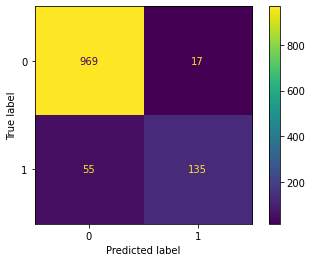

In [231]:
ConfusionMatrixDisplay.from_predictions(y_train2,best_model.predict(X_train2))

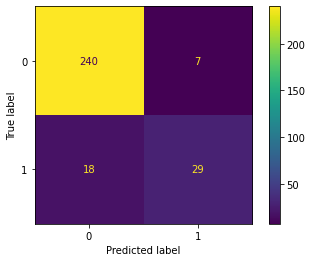

In [232]:
ConfusionMatrixDisplay.from_predictions(y_test2,best_model.predict(X_test2))

The best accuracy on test set that I have got by using Logistic Regression is 91.49 %

To better control precision and recall we can use predict_proba and try different thresholds according to our needs

#### Decision Tree

In [236]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [240]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train1,y_train1)
dt.score(X_train1, y_train1),dt.score(X_test1, y_test1)

(1.0, 0.8333333333333334)

In [245]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train2,y_train2)
dt.score(X_train2, y_train2),dt.score(X_test2, y_test2)

(1.0, 0.8503401360544217)

THIS IS A CLEAR CASE OF OVERFITTING

In [271]:
dt = DecisionTreeClassifier(random_state=42)
params = {
    'min_samples_split':[2,5,9,15,20],
    'criterion': ["gini", "entropy"]
}

In [272]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, scoring = "accuracy")

In [273]:
best_model = grid_search.fit(X_train1, y_train1)
best_model.score(X_train1, y_train1),best_model.score(X_test1, y_test1)

(0.9447278911564626, 0.8775510204081632)

In [274]:
best_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=42)

In [275]:
best_model = grid_search.fit(X_train2, y_train2)
best_model.score(X_train2, y_train2),best_model.score(X_test2, y_test2)

(0.9472789115646258, 0.8605442176870748)

Best accuracy that we get using Decision Tree Classifier is 87%

#### K-Nearest Neighbours

In [276]:
from sklearn.neighbors import KNeighborsClassifier

In [277]:
knn=KNeighborsClassifier()
knn.fit(X_train1,y_train1)
knn.score(X_train1,y_train1),knn.score(X_test1,y_test1)

(0.9056122448979592, 0.8843537414965986)

In [278]:
knn=KNeighborsClassifier()
knn.fit(X_train2,y_train2)
knn.score(X_train2,y_train2),knn.score(X_test2,y_test2)

(0.9064625850340136, 0.8775510204081632)

In [280]:
leaf_size = list(range(5,15));n_neighbors = list(range(5,15));p=[1,2]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

knn = KNeighborsClassifier()
clf = GridSearchCV(knn, hyperparameters, cv=10)

best_model = clf.fit(X_train1,y_train1)

print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 5
Best p: 1
Best n_neighbors: 7


In [281]:
best_model.score(X_test1,y_test1)

0.8707482993197279

In [282]:
best_model = clf.fit(X_train1,y_train1)

print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
best_model.score(X_train1,y_train1),best_model.score(X_test1,y_test1)

Best leaf_size: 5
Best p: 1
Best n_neighbors: 7


(0.9107142857142857, 0.8707482993197279)

Best Accuracy attained using KNN is 87%

Support Vector Machines

In [283]:
from sklearn.svm import SVC

In [284]:
svm=SVC()

In [285]:
svm.fit(X_train1,y_train1)
svm.score(X_train1,y_train1),svm.score(X_test1,y_test1)

(0.9498299319727891, 0.9047619047619048)

In [286]:
svm.fit(X_train2,y_train2)
svm.score(X_train2,y_train2),svm.score(X_test2,y_test2)

(0.9523809523809523, 0.9047619047619048)

In [287]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True)


In [288]:
grid.fit(X_train1, y_train1)
grid.score(X_train1,y_train1),grid.score(X_test1,y_test1)

(0.9302721088435374, 0.9115646258503401)

In [289]:
grid.fit(X_train2, y_train2)
grid.score(X_train2,y_train2),grid.score(X_test2,y_test2)

(0.9642857142857143, 0.9217687074829932)

Best accuracy that we can get using SVM is 92%

#### Random Forest

In [292]:
from sklearn.ensemble import RandomForestClassifier

In [293]:
rfc=RandomForestClassifier()

In [295]:
rfc.fit(X_train1,y_train1)
rfc.score(X_train1,y_train1),rfc.score(X_test1,y_test1)

(1.0, 0.891156462585034)

In [296]:
rfc.fit(X_train2,y_train2)
rfc.score(X_train2,y_train2),rfc.score(X_test2,y_test2)

(1.0, 0.9081632653061225)

In [307]:
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 25, num = 2)]
min_samples_split = [2, 5, 10,15]
min_samples_leaf = [1, 2, 4, 7]
bootstrap = [True, False]
param_grid = {'n_estimators': n_estimators,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random = RandomizedSearchCV(RandomForestClassifier(), param_grid, refit = True, n_iter=15)


In [308]:
random.fit(X_train1,y_train1)
random.score(X_train1,y_train1),random.score(X_test1,y_test1)

(1.0, 0.8979591836734694)

In [309]:
random.fit(X_train2,y_train2)
random.score(X_train2,y_train2),random.score(X_test2,y_test2)

(1.0, 0.9013605442176871)

Random Forest is extremely overfitting and the best accuracy we get is of 90% on test score

In [ ]:
data.columns

Index(['Department', 'Job_Role', 'Gender', 'Age', 'Marital_Status',
       'Education', 'Education_Field', 'Business_Travel',
       'Distance_From_Home_(kms)', 'Job_Involvement', 'Job_Level',
       'Job_Satisfaction', 'Monthly_Income_(USD)', 'Salary_Hike_(%)',
       'Stock_Option_Level', 'Over_Time', 'No._of_Companies_Worked',
       'Total_Working_Years', 'Years_At_Company', 'Years_In_Current_Role',
       'Years_Since_Last_Promotion', 'Years_With_Curr_Manager',
       'Environment_Satisfaction', 'Training_Times_Last_Year',
       'Work_Life_Balance', 'Relationship_Satisfaction', 'Attrition_(Yes/No)'],
      dtype='object')